# Part A - MLP Coursework 2 

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


def train_model_and_plot_stats(model,
                               error,
                               learning_rule,
                               train_data,
                               valid_data,
                               test_data,
                               num_epochs,
                               stats_interval,
                               notebook=True):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors = {'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        data_monitors,
        notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(
        num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')

    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


In [4]:
print("\t\t\tnum_batches * batch_size = size of inputs")
print("train_data\t\t", train_data.num_batches, " * ", train_data.batch_size, " = ", len(train_data.inputs))
print("valid_data\t\t", valid_data.num_batches, " * ", valid_data.batch_size, " = ", len(valid_data.inputs))
print("test_data\t\t", test_data.num_batches, " * ", test_data.batch_size, " = ", len(test_data.inputs))

			num_batches * batch_size = size of inputs
train_data		 1000  *  100  =  100000
valid_data		 158  *  100  =  15800
test_data		 158  *  100  =  15800


In [5]:
###### The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropyLogSoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 60 # TODO: CHANGED HERE FOR TESTING ONLY!
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

# A1 :: Baseline Experimens using DNN on EMNIST

Using the same parameters as in coursework1:
- training parameters:
    - epoch number = 100
    - learning rate = 0.01

## Experiment 1,2 : Changing number of hidden layers (2-10) , Activation Function

Experiment procedure:

1) The following parameters are fixed, while the only changes to each iteration of the experiment is the number of hidden layers:

    - gradient descent learning rule: vanilla SGD
    - weights initialisation method: `GlorotUniformInit` (Xavier init) as in [1]
    - Number of nodes in each hidden layer (100)
    - training rate/ number of epochs
    
2) Statistics for each sub-experiment (with different number of hidden layer) were collected

================================

[1] Glorot, X., Benigo, Y., 2010 Understanding the difficulty of training deep feedforwrd neural network

### Sigmoid Activation Function

In [ ]:
func = SigmoidLayer()
experiment_layers_sigmoid = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_sigmoid[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=47)
) 2 layers


Epoch 1: 2.4s to complete
    error(train)=3.83e+00, acc(train)=4.83e-02, error(valid)=3.83e+00, acc(valid)=4.80e-02, error(test)=3.83e+00, acc(test)=4.70e-02
Epoch 2: 2.4s to complete
    error(train)=3.81e+00, acc(train)=8.05e-02, error(valid)=3.81e+00, acc(valid)=7.62e-02, error(test)=3.81e+00, acc(test)=7.95e-02
Epoch 3: 2.4s to complete
    error(train)=3.79e+00, acc(train)=1.52e-01, error(valid)=3.79e+00, acc(valid)=1.51e-01, error(test)=3.79e+00, acc(test)=1.53e-01
Epoch 4: 2.4s to complete
    error(train)=3.75e+00, acc(train)=1.90e-01, error(valid)=3.76e+00, acc(valid)=1.87e-01, error(test)=3.76e+00, acc(test)=1.83e-01
Epoch 5: 2.4s to complete
    error(train)=3.71e+00, acc(train)=1.97e-01, error(valid)=3.71e+00, acc(valid)=1.96e-01, error(test)=3.71e+00, acc(test)=1.91e-01
Epoch 6: 2.4s to complete
    error(train)=3.63e+00, acc(train)=2.31e-01, error(valid)=3.63e+00, acc(valid)=2.24e-01, error(test)=3.63e+00, acc(test)=2.23e-01
Epoch 7: 2.4s to complete
    error(train)=3.5

limit_output extension: Maximum message size of 5000 exceeded with 5153 characters

Text(0.5,0,'epoch number')

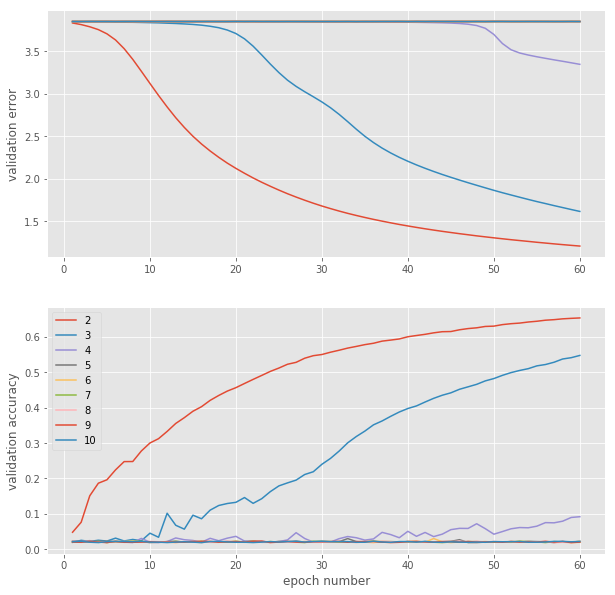

In [18]:
# Generate some statistics for SIGMOID layer:
final_valid_err_sigmoid = []
final_valid_acc_sigmoid = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_sigmoid.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### RELU Activation Function

In [ ]:
func = ReluLayer()
experiment_layers_relu = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_relu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

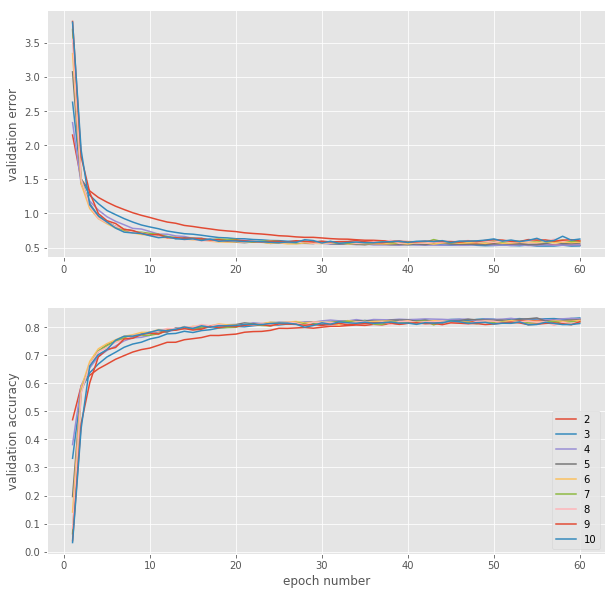

In [19]:
# Generate some statistics for RELU layer:
final_valid_err_relu = []
final_valid_acc_relu = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_relu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_relu.append(stats[-1, keys['error(valid)']])
    final_valid_acc_relu.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### ELU Activation Function

In [ ]:
func = ELULayer()
experiment_layers_elu = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_elu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

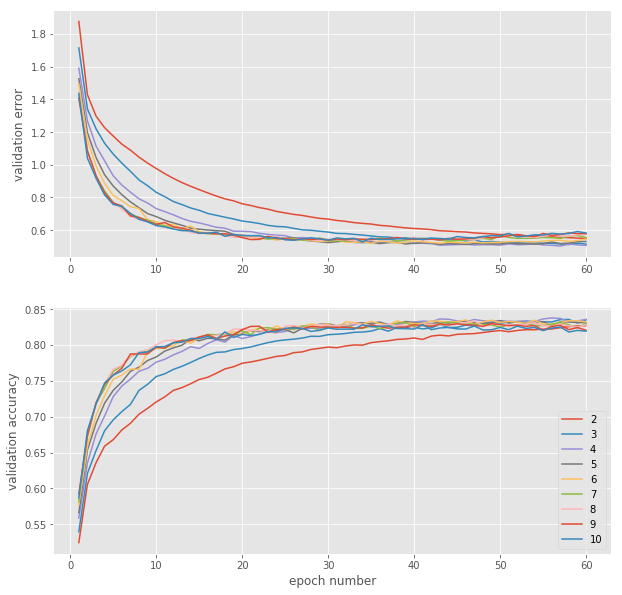

In [20]:
# Generate some statistics for SIGMOID layer:
final_valid_err_elu = []
final_valid_acc_elu = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_elu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### SELU Activation Function

In [ ]:
func = SELULayer()
experiment_layers_selu = {}

In [ ]:
for i in range(1, 10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_selu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

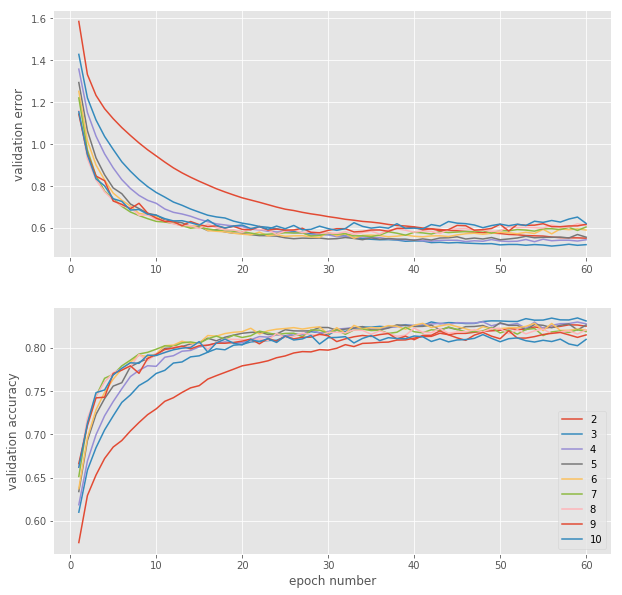

In [21]:
# Generate some statistics for SIGMOID layer:
final_valid_err_selu = []
final_valid_acc_selu = []

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_layers_selu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

### DropOut Layer

## Experiment 3: Changing number of hidden units
So far, all is 100 units, we can try to increase at intervals of 100 to size of the input_dim = 800;

Fixing the number of hidden layers at 10!

In [ ]:
func = ELULayer()
experiment_units_elu = {}
hidden_layers = 9  # + 1 = 10 layers

### 100-200-300-400

In [ ]:
hidden_units = [100, 200, 300, 400]
for hidden_dim in hidden_units:
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * hidden_layers
                               + output_layer)
    print(model, '{} layers'.format(hidden_layers + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_units_elu[hidden_dim] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

### 500-600-700

In [ ]:
hidden_units =[500, 600, 700]
for hidden_dim in hidden_units:
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        func,
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        func,
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * hidden_layers
                               + output_layer)
    print(model, '{} layers'.format(hidden_layers + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_units_elu[hidden_dim] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

Text(0.5,0,'epoch number')

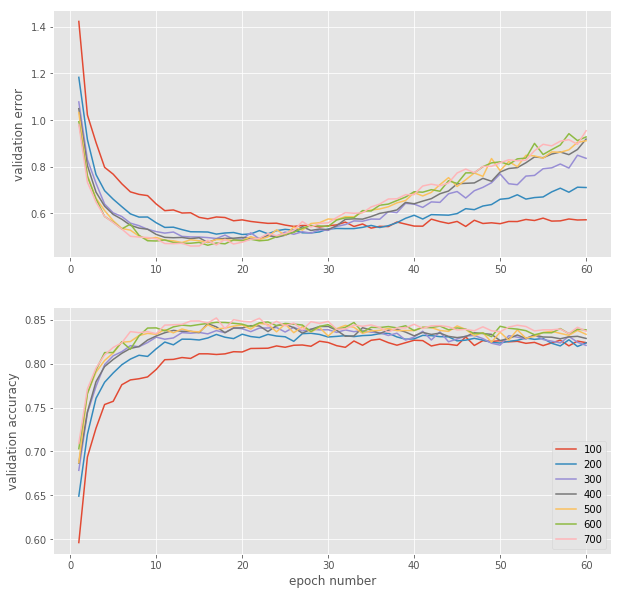

In [22]:
exfig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in experiment_units_elu.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

# Learning Rule (A2-A3)
Perform experiments to compare `stochastic gradient descent`, `RMSProp`, and `Adam` for deep neural network
training on EMNIST Balanced , building on your earlier baseline experiments.

## Stochastic Gradient Descent (SGD)

## RMSProp

In [39]:
from mlp.learning_rules import RMSPropLearningRule

In [ ]:
expt_LR_RMS = {}
hidden_dim = 500

In [ ]:
for i in range(1,10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = RMSPropLearningRule() # Use default parameters here

    expt_LR_RMS[i+1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=47)
) 2 layers


Epoch 1: 22.1s to complete
    error(train)=5.53e-01, acc(train)=8.17e-01, error(valid)=5.94e-01, acc(valid)=8.06e-01, error(test)=6.38e-01, acc(test)=7.94e-01
Epoch 2: 22.0s to complete
    error(train)=4.18e-01, acc(train)=8.54e-01, error(valid)=4.94e-01, acc(valid)=8.34e-01, error(test)=5.48e-01, acc(test)=8.17e-01
Epoch 3: 22.1s to complete
    error(train)=3.54e-01, acc(train)=8.74e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01, error(test)=5.20e-01, acc(test)=8.32e-01
Epoch 4: 21.9s to complete
    error(train)=3.03e-01, acc(train)=8.90e-01, error(valid)=4.56e-01, acc(valid)=8.53e-01, error(test)=5.09e-01, acc(test)=8.41e-01
Epoch 5: 21.4s to complete
    error(train)=2.76e-01, acc(train)=8.99e-01, error(valid)=4.69e-01, acc(valid)=8.51e-01, error(test)=5.22e-01, acc(test)=8.42e-01
Epoch 6: 21.6s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=4.96e-01, acc(valid)=8.52e-01, error(test)=5.47e-01, acc(test)=8.46e-01
Epoch 7: 21.7s to complete
    error(tra

limit_output extension: Maximum message size of 5000 exceeded with 5017 characters

Text(0.5,0,'epoch number')

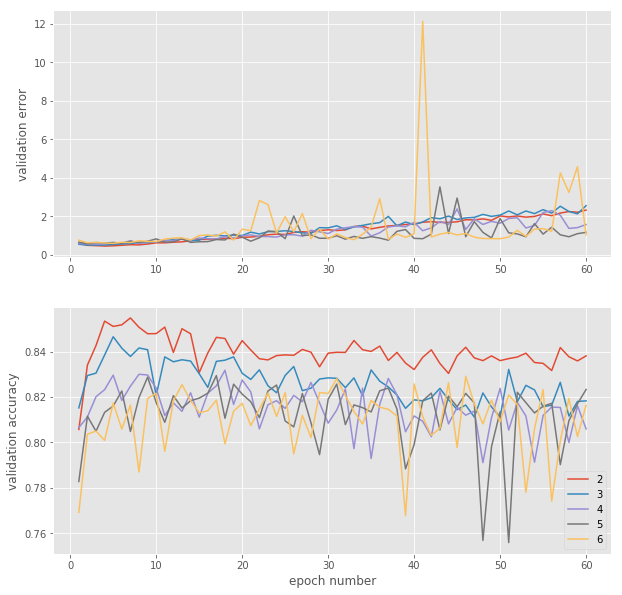

In [42]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in expt_LR_RMS.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    #     final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    #     final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

## Adam Learning Rule

In [43]:
from mlp.learning_rules import AdamLearningRule

In [ ]:
expt_LR_ADAM = {}
hidden_dim = 500

In [ ]:
for i in range(1,10):
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
    ]
    output_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = AdamLearningRule() # Use default parameters here

    expt_LR_ADAM[i+1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=500)
    ReluLayer
    AffineLayer(input_dim=500, output_dim=47)
) 2 layers


Epoch 1: 25.2s to complete
    error(train)=5.37e-01, acc(train)=8.22e-01, error(valid)=5.88e-01, acc(valid)=8.07e-01, error(test)=6.17e-01, acc(test)=7.97e-01
Epoch 2: 25.0s to complete
    error(train)=4.09e-01, acc(train)=8.57e-01, error(valid)=4.92e-01, acc(valid)=8.35e-01, error(test)=5.21e-01, acc(test)=8.27e-01
Epoch 3: 24.9s to complete
    error(train)=3.56e-01, acc(train)=8.75e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01, error(test)=5.00e-01, acc(test)=8.35e-01
Epoch 4: 25.5s to complete
    error(train)=3.01e-01, acc(train)=8.89e-01, error(valid)=4.40e-01, acc(valid)=8.49e-01, error(test)=4.74e-01, acc(test)=8.42e-01
Epoch 5: 25.0s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=4.47e-01, acc(valid)=8.49e-01, error(test)=4.81e-01, acc(test)=8.41e-01
Epoch 6: 25.0s to complete
    error(train)=2.46e-01, acc(train)=9.07e-01, error(valid)=4.48e-01, acc(valid)=8.52e-01, error(test)=4.89e-01, acc(test)=8.40e-01
Epoch 7: 25.1s to complete
    error(tra

limit_output extension: Maximum message size of 5000 exceeded with 5017 characters

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for (layer, output) in expt_LR_ADAM.items():
    keys = output[1]
    stats = output[0]
    # Store the statistics for this model
    #     final_valid_err_sigmoid.append(stats[-1, keys['error(valid)']])
    #     final_valid_acc_sigmoid.append(stats[-1, keys['acc(valid)']])
    # plot the accuracy for each layer
    ax1.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['error(valid)']])
    ax2.plot(
        np.arange(1, stats.shape[0]) * stats_interval,
        stats[1:, keys['acc(valid)']], 
        label=layer)
    
ax2.legend(loc='best');
ax1.set_ylabel('validation error')
ax2.set_ylabel('validation accuracy')
ax2.set_xlabel('epoch number')

# BatchNorm Layer (A4-A7)
Perform experiments on EMNIST Balanced to investigate the impact of using batch normalisation in deep neural networks, building on your earlier experiments

## Sigmoid + BatchNorm 

In [26]:
from mlp.layers import BatchNormalizationLayer
experiment_layers_BN_sigmoid = {}

In [27]:
# It is said the batchnorm prevent the network fro getting stuck in the saturated nodes - try with sigmoid:

In [28]:
for i in range(1,10):
    # reinitialisation of func needed for every expt!
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
    ]
    output_layer = [
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        BatchNormalizationLayer(input_dim=hidden_dim, rng=rng),
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_BN_sigmoid[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=100)
    BatchNormalizationLayer(input_dim=100)
    SigmoidLayer
    AffineLayer(input_dim=100, output_dim=47)
) 2 layers


Epoch 1: 5.0s to complete
    error(train)=3.35e+00, acc(train)=3.51e-01, error(valid)=3.34e+00, acc(valid)=3.51e-01, error(test)=3.35e+00, acc(test)=3.42e-01
Epoch 2: 5.2s to complete
    error(train)=3.09e+00, acc(train)=4.44e-01, error(valid)=3.09e+00, acc(valid)=4.43e-01, error(test)=3.10e+00, acc(test)=4.33e-01
Epoch 3: 5.1s to complete
    error(train)=2.88e+00, acc(train)=4.90e-01, error(valid)=2.89e+00, acc(valid)=4.85e-01, error(test)=2.89e+00, acc(test)=4.79e-01
Epoch 4: 5.1s to complete
    error(train)=2.70e+00, acc(train)=5.14e-01, error(valid)=2.71e+00, acc(valid)=5.12e-01, error(test)=2.72e+00, acc(test)=5.03e-01
Epoch 5: 5.3s to complete
    error(train)=2.55e+00, acc(train)=5.40e-01, error(valid)=2.55e+00, acc(valid)=5.37e-01, error(test)=2.56e+00, acc(test)=5.28e-01
Epoch 6: 5.0s to complete
    error(train)=2.41e+00, acc(train)=5.58e-01, error(valid)=2.42e+00, acc(valid)=5.55e-01, error(test)=2.43e+00, acc(test)=5.42e-01
Epoch 7: 5.2s to complete
    error(train)=2.2

limit_output extension: Maximum message size of 5000 exceeded with 5079 characters

## RELU + BatchNorm

Each Layer:
- ...
- previous layer output
- Batch norm layer
- activation function layer
- ...

In [ ]:
experiment_layers_BN_relu = {}

In [ ]:
for i in range(1,10):
    # reinitialisation of func needed for every expt!
    train_data.reset()
    test_data.reset()
    valid_data.reset()

    # Initialise the weights and biases:
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    input_layer = [
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        BatchNormalizationLayer(input_dim=hidden_dim, rng=rng)
    ]
    output_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ]
    each_hidden_layer = [
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        BatchNormalizationLayer(input_dim=hidden_dim, rng=rng),
    ]

    # create the MLP:
    model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                               output_layer)
    print(model, '{} layers'.format(i + 1))

    error = CrossEntropyLogSoftmaxError()
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    experiment_layers_BN_relu[i + 1] = train_model_and_plot_stats(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        num_epochs,
        stats_interval,
        notebook=False)

# SAVING FILES

In [34]:
import pickle as pkl

In [40]:
# Save the stuff:
pkl.dump(experiment_units_elu, open('./experiment_units_elu.pkl', 'wb'), protocol=-1)

In [41]:
# Save the stuff:
pkl.dump(experiment_layers_elu, open('./experiment_layers_elu.pkl', 'wb'), protocol=-1)

In [42]:
# Save the stuff:
pkl.dump(experiment_layers_relu, open('./experiment_layers_relu.pkl', 'wb'), protocol=-1)

In [43]:
# Save the stuff:
pkl.dump(experiment_layers_selu, open('./experiment_layers_selu.pkl', 'wb'), protocol=-1)

In [44]:
# Save the stuff:
pkl.dump(experiment_layers_sigmoid, open('./experiment_layers_sigmoid.pkl', 'wb'), protocol=-1)